# Homework: reverse exploration

##### Step 1
 - pick one of the following datasets: `tips`, `planets`, `solar capacity`, and `renewable mix`

##### Step 2
 - pick one of the `seaborn` API that we have not explored so far: e.g.) `boxenplot`, `swarmplot`, `violinplot` and so on.

##### Step 3
 - formulate your question and hypothesis that you can validate on the chosen dataset using the chosen API

##### Step 4
 - extract or compute the proper features from the chosen dataset to validate or reject your hypothesis

##### Step 5
 - read carefully the usage and the syntax of API in the `seaborn` tutorial and API instructions

##### Step 6
 - visualize and play around more to validate or reject your hypothesis

##### Step 7
 - share your finding with the classmates in the next class

**Please go through the following checklist if you are done**

# Checklist

- Do you feel now more comfortable with formulating the question and the hypothesis?
- Do you feel now more comfortable with extracting the relevant information and adding new features to `pandas DataFrame`?
- Are you more confident that you can learn the syntax of a new plotting function by your own?

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
bucketed_bill = []
for i in tips['total_bill']:
  if i < 5:
    bucketed_bill.append('0-5')
  elif i < 10:
    bucketed_bill.append('5-10')
  elif i < 15:
    bucketed_bill.append('10-15')
  else:
    bucketed_bill.append('+15')

In [0]:
tips['bucketed_bill'] = bucketed_bill

In [7]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,bucketed_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,+15
1,10.34,1.66,Male,No,Sun,Dinner,3,10-15
2,21.01,3.50,Male,No,Sun,Dinner,3,+15
3,23.68,3.31,Male,No,Sun,Dinner,2,+15
4,24.59,3.61,Female,No,Sun,Dinner,4,+15
5,25.29,4.71,Male,No,Sun,Dinner,4,+15
6,8.77,2.00,Male,No,Sun,Dinner,2,5-10
7,26.88,3.12,Male,No,Sun,Dinner,4,+15
8,15.04,1.96,Male,No,Sun,Dinner,2,+15
9,14.78,3.23,Male,No,Sun,Dinner,2,10-15


**Hypothesis**: There is a range of price within which the total bill of the dish is likely to fall. And this range of price depends on the table size.

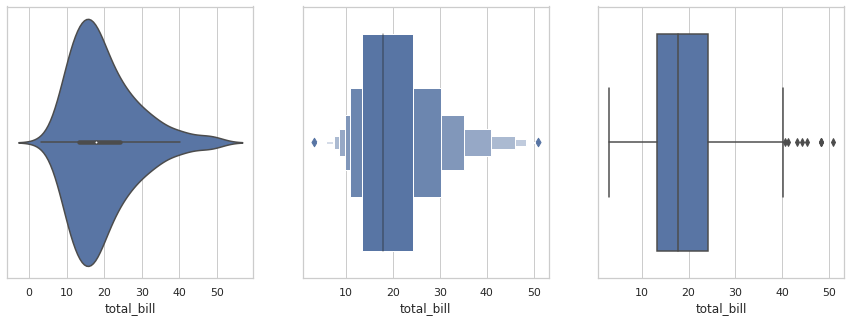

In [8]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.violinplot(x='total_bill', data=tips, ax=axes[0]) # Shows the overall distribution shape
sns.boxenplot(x='total_bill', data=tips, ax=axes[1])  # Shows a larger number of quantiles
sns.boxplot(x='total_bill', data=tips, ax=axes[2]);   # Shows only 1st, 2nd and 3rd quantiles

Each of these plots are more or less granular versions of boxplots. The boxplot being a gross summary of the distribution and the violinplot being the distribution combined with the values of the 1st, 2nd and 3rd quartiles.

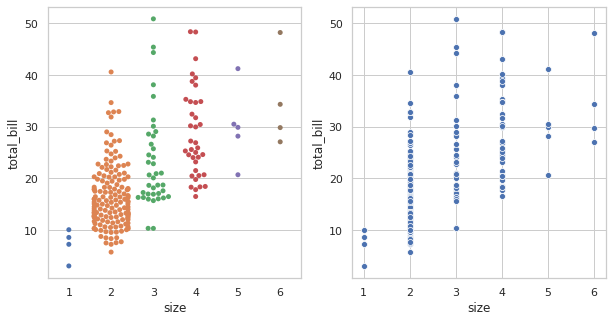

In [9]:
f, axes = plt.subplots(1, 2, figsize=(10,5))
sns.swarmplot(y='total_bill', x='size', data=tips, ax=axes[0])    # Shows supperposition of points not visible with a scatterplot
sns.scatterplot(y='total_bill', x='size', data=tips, ax=axes[1]); # Shows points at the same place impossible to know about density

From the swarm plot you can notice that:
- Most of the tables are tables for 2
- If you are 2 people changes are you are going to pay between 10 and 20e 
- If you are 3 people chances are you are going to pay between 15 and 25e
- If you are 4 people the price range is really spread but you will pay at least 18


Here we wonder now if the size of the table has an impact on the price per person so we compute a new feature called `price_per_person`

In [0]:
tips['price_per_person']=tips['total_bill']/tips['size']

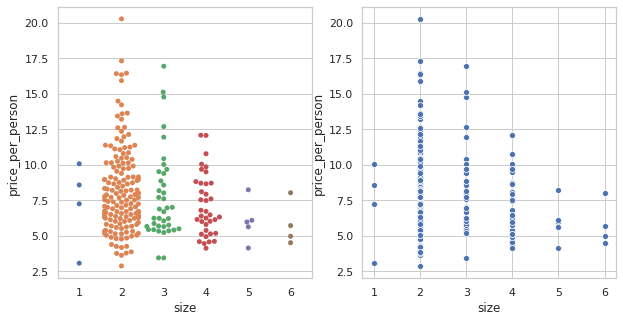

In [11]:
f, axes = plt.subplots(1, 2, figsize=(10,5))
sns.swarmplot(y='price_per_person', x='size', data=tips, ax=axes[0])    # Shows supperposition of points not visible with a scatterplot
sns.scatterplot(y='price_per_person', x='size', data=tips, ax=axes[1]); # Shows points at the same place impossible to know about density

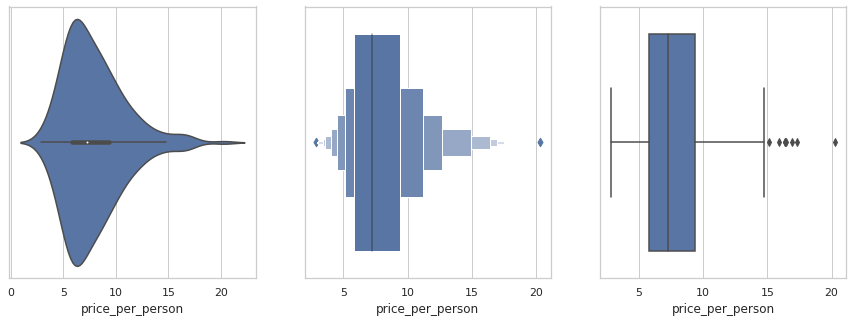

In [12]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.violinplot(x='price_per_person', hue='size', data=tips, ax=axes[0]) # Shows the overall distribution shape
sns.boxenplot(x='price_per_person', hue='size', data=tips, ax=axes[1])  # Shows a larger number of quantiles
sns.boxplot(x='price_per_person', hue='size', data=tips, ax=axes[2]);   # Shows only 1st, 2nd and 3rd quantiles

**Conclusion**

We can see from thte above plot that the price per person seems to be decreasing with the number of person at the table. 

> So better eat at a restaurant in a group.